<a href="https://colab.research.google.com/github/mithun-martin/MACHINE-LEARNING/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [7]:
data = pd.read_csv("/content/credit_data.csv")
data.head(20)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [8]:

#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


In [9]:
feature = data[["income","age","loan"]]
target = data[["default"]]


In [10]:
feature.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [11]:
target.head()

,default
0,0
1,0
2,0
3,0
4,1


In [12]:
#income age loan ie feature need some  preprocessing
#📌 Why Preprocessing / Scaling is needed?
#In many ML algorithms (like KNN, SVM, Logistic Regression)
#👉 If your dataset features have different ranges (like Age: 20-70, Salary: 3000-100000),
#features with larger scales will dominate distance-based or optimization-based algorithms.
#So — we scale all features to a common range to avoid that.

In [13]:
#👉 minmax processing This scales every feature to a range between 0 and 1

In [15]:
feature = preprocessing.MinMaxScaler().fit_transform(feature)

In [17]:
feature_train, feature_test, target_train, target_test = train_test_split(feature,target)

In [19]:
#TRAINING THE MODEL
model = KNeighborsClassifier(n_neighbors = 32)
#n_neighbors=32 means when classifying a new point, it will look at the 32 nearest neighbors and do a majority vote
#But right now — it’s just a model object with no training data attached yet

model.fit(feature_train, target_train)
predictions = model.predict(feature_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# 📌 Why can't we blindly pick a value for K in KNN?
# --------------------------------------------------
# In K-Nearest Neighbors:
# - If K is too small (like K=1), the model might overfit.
#   ➝ It becomes too sensitive to noise or outliers in the training data.
#
# - If K is too large (like K=100), the model might underfit.
#   ➝ It becomes too generalized and ignores important patterns.
#
# So — we need to find a balanced, optimal K value.
# That’s the value where the model performs well on unseen data (not too specific, not too generic).


In [22]:
#📌 How do we find the optimal K?
#👉 By trying multiple K values (from 1 to 100)
#👉 Testing model accuracy for each K value
#👉 And picking the K value that gives the highest accuracy
#👉 But — instead of doing this on one train/test split (which can be biased), we use cross-validation

#📖 What is cross-validation?
#Cross-validation (like K-Fold) splits your data into K parts (folds), trains the model K times — each time using a different part as test data and others as training.
#Then takes the average accuracy over all folds


In [26]:
cross_valid_scores = []
#1️⃣ Create an empty list to store cross-validation scores

for k in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=k)
  # For each K value, create a KNN model

  #Perform 10-Fold Cross-Validation
  score = cross_val_score(knn,feature,target,cv = 10,scoring = "accuracy")
  #cv=10 → 10-fold cross-validation
  #scoring='accuracy' → Evaluate using accuracy score
  #Result: scores contains 10 accuracy values (one for each fold)

  cross_valid_scores.append(score.mean())
  #taking mean of 10 accurate scores
  #therefore now 4 each k value now u have one avg accuracyy value

  #After the loop, find the index of the highest score

print(np.argmax(cross_valid_scores))



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

32


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[417   6]
 [ 14  63]]
0.96


<Axes: >

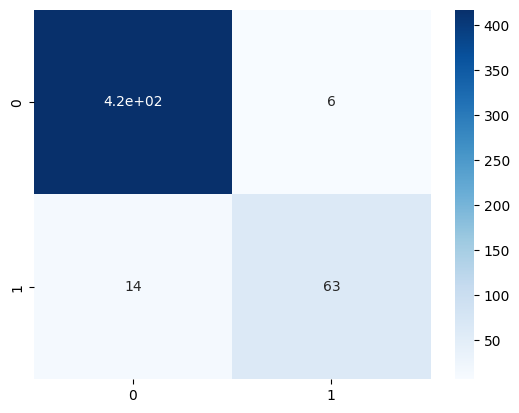

In [28]:

import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')
